### Name: Nitin Kumar Singh

#### #GRIPMAY2021

### **#TASK4:** Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’.

- As a security/defense analyst, try to find out the hot zone of terrorism.
- What all security issues and insights you can derive by EDA?

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
import os, sys, re

import warnings
DeprecationWarning("ignore")
warnings.filterwarnings("ignore")

from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

### Loading Data

In [2]:
data = pd.read_csv('global_terrorism.csv')
data.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [3]:
data.shape

(181691, 135)

It's a huge data and have so many columns. We must have to alter these data, but lets make a copy of it and also get more information about the data.

### Section 1

### Data Preprocessing

In [4]:
df = data.copy()

In [5]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

Let's extract out the important focusing column from the data first.

In [6]:
df = df[['iyear','imonth','country_txt','region_txt','latitude','longitude']]

df.columns = ['Year', 'Month', 'Country', 'Region', 'Latitude','Longitude']

df.head()

Year  Month             Country                       Region   Latitude  \
0  1970      7  Dominican Republic  Central America & Caribbean  18.456792   
1  1970      0              Mexico                North America  19.371887   
2  1970      1         Philippines               Southeast Asia  15.478598   
3  1970      1              Greece               Western Europe  37.997490   
4  1970      1               Japan                    East Asia  33.580412   

    Longitude  
0  -69.951164  
1  -99.086624  
2  120.599741  
3   23.762728  
4  130.396361

In [7]:
df.shape

(181691, 6)

So, here I minimized the number of columns.

In [8]:
df.isnull().sum()

Year            0
Month           0
Country         0
Region          0
Latitude     4556
Longitude    4557
dtype: int64

In [9]:
## percentage of null values

for i in range(len(df.columns)):
    print(f'Percentage of missing values in {df.columns[i]} is: ', np.round(((df.isnull().sum()[i])/len(df))*100))

Percentage of missing values in Year is:  0.0
Percentage of missing values in Month is:  0.0
Percentage of missing values in Country is:  0.0
Percentage of missing values in Region is:  0.0
Percentage of missing values in Latitude is:  3.0
Percentage of missing values in Longitude is:  3.0


Perfect, as per the ideology we can treat or remove ~15% of the data in the large data sets too. I'm just dropping nan values from the dataset.

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(177134, 6)

In [12]:
df[df==0].count()

Year          0
Month        16
Country       0
Region        0
Latitude      0
Longitude     0
dtype: int64

16 months are 0 which is not really possible. So let's drop months=0

In [13]:
df = df[df.Month != 0].reset_index()
df.drop(['index'], axis=1, inplace=True)

In [14]:
df.shape

(177118, 6)

16 more rows has been dropped

In [15]:
df.dtypes

Year           int64
Month          int64
Country       object
Region        object
Latitude     float64
Longitude    float64
dtype: object

In [16]:
df['Year'] = df['Year'].astype("str")
df['Month'] = df['Month'].astype("str")

In [17]:
df["Date"] = pd.to_datetime(df["Month"] + "/" + df["Year"])
df['Date'] = df['Date'].dt.strftime('%Y-%m')

In [18]:
df.head()

Year Month             Country                       Region   Latitude  \
0  1970     7  Dominican Republic  Central America & Caribbean  18.456792   
1  1970     1         Philippines               Southeast Asia  15.478598   
2  1970     1              Greece               Western Europe  37.997490   
3  1970     1               Japan                    East Asia  33.580412   
4  1970     1       United States                North America  37.005105   

    Longitude     Date  
0  -69.951164  1970-07  
1  120.599741  1970-01  
2   23.762728  1970-01  
3  130.396361  1970-01  
4  -89.176269  1970-01

### Exploratory Data Analysis

In [19]:
df.nunique()

Year            47
Month           12
Country        204
Region          12
Latitude     48321
Longitude    48039
Date           564
dtype: int64

In [20]:
temp = df['Country'].value_counts().reset_index()
temp.columns = ["Country","Attacks"]
Top_20 = temp.head(20)
Top_20

Country  Attacks
0             Iraq    24487
1         Pakistan    14317
2      Afghanistan    12639
3            India    11801
4         Colombia     7834
5      Philippines     6527
6             Peru     5808
7   United Kingdom     5227
8      El Salvador     4845
9           Turkey     4124
10         Somalia     4120
11         Nigeria     3866
12        Thailand     3806
13           Yemen     3270
14           Spain     3195
15       Sri Lanka     2909
16   United States     2835
17          France     2669
18         Algeria     2617
19           Egypt     2458

As, here we can see Top 20 countries with maximum number of attacks.

In [21]:
df.head()

Year Month             Country                       Region   Latitude  \
0  1970     7  Dominican Republic  Central America & Caribbean  18.456792   
1  1970     1         Philippines               Southeast Asia  15.478598   
2  1970     1              Greece               Western Europe  37.997490   
3  1970     1               Japan                    East Asia  33.580412   
4  1970     1       United States                North America  37.005105   

    Longitude     Date  
0  -69.951164  1970-07  
1  120.599741  1970-01  
2   23.762728  1970-01  
3  130.396361  1970-01  
4  -89.176269  1970-01

In [22]:
plt.figure(figsize=(16,8))
ax = sns.barplot(Top_20['Country'],Top_20['Attacks'])
ax.set_xlabel('\nCountry',size=15)
ax.set_ylabel('Number of Attacks\n', size=15)
plt.title("Top 20 Countries with Maximum Number of Attacks", size=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right");

**Observations:**
- Iran has faced maximum number of terrorist attcks than any other country.
- Pakistan, Afghanisthan, India all are each others neighbour faces also faced alot more terror attacks.

**Map Representation:**

In [23]:
temp = df['Country'].value_counts().reset_index()
temp.columns = ['Country', 'Attacks']

temp1 = df.copy()
temp1.drop_duplicates(subset ='Country', inplace=True)
temp1 = temp1.reset_index(drop=True)

final = pd.merge(temp1,temp, on='Country')

final['text'] = final['Country'] + " " + final['Attacks'].astype(str)  #contatinating strings for text visualization


fig = go.Figure(data=go.Scattergeo(
        lon = final['Longitude'],      # longitude
        lat = final['Latitude'],       # latitude
        text = final['text'],          # text mentioned above
        mode = 'markers',              # marker using for the points on the map 
        marker = dict(
            size = 10,
            opacity = 1,
            reversescale = False,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=0.5,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Reds',
            cmin = 0,
            color = final['Attacks'],
            cmax = final['Attacks'].max(),
            colorbar_title="Number of Attacks"
        )))

fig.update_layout(
        title = 'Orders by State',
        geo = dict(
            showland = True,
            landcolor = "rgb(60, 70, 80)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 1,
            subunitwidth = 1
        ),
    )
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
fig = px.choropleth(final, locations="Country", 
                    locationmode='country names', color=np.log(final["Attacks"]), 
                    hover_name="Country", hover_data=['Attacks'],
                    color_continuous_scale="peach", 
                    title='Country with Number of Attcaks')
fig.update(layout_coloraxis_showscale=False)
fig.show()

<IPython.core.display.Javascript object>

In [25]:
temp = df['Region'].value_counts().reset_index()
temp.columns = ["Region","Attacks"]
temp

Region  Attacks
0    Middle East & North Africa    49575
1                    South Asia    44478
2                 South America    18108
3            Sub-Saharan Africa    17011
4                Western Europe    16478
5                Southeast Asia    11945
6   Central America & Caribbean     9343
7                Eastern Europe     5117
8                 North America     3448
9                     East Asia      791
10                 Central Asia      548
11        Australasia & Oceania      276

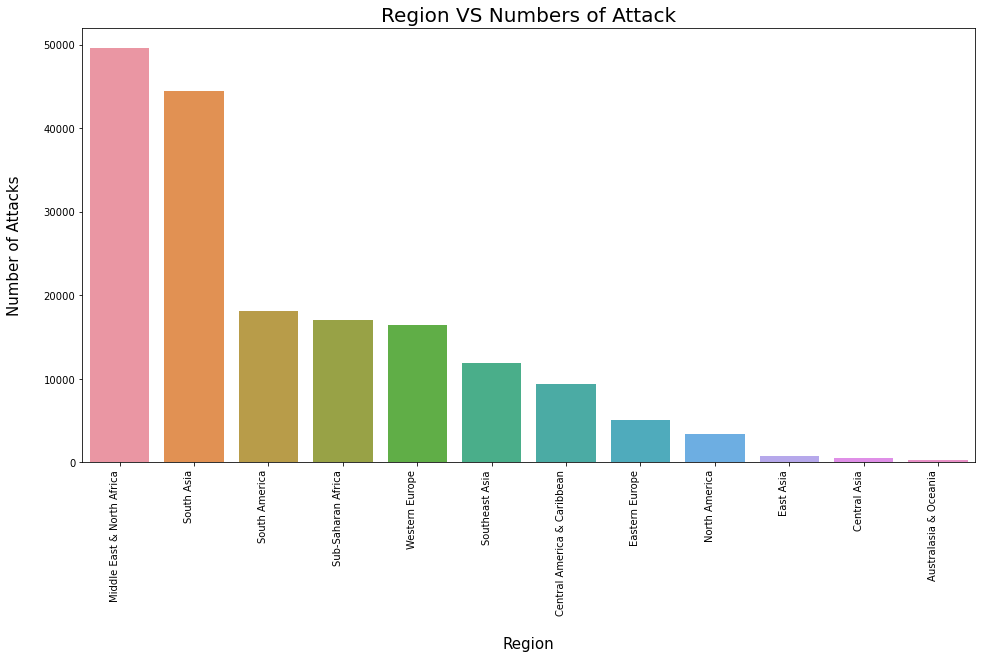

In [26]:
plt.figure(figsize=(16,8))
ax = sns.barplot(temp['Region'],temp['Attacks'])
ax.set_xlabel('\nRegion',size=15)
ax.set_ylabel('Number of Attacks\n', size=15)
plt.title("Region VS Numbers of Attack", size=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right");

**Observations:**
- Middle East & North Africa and South Asia has faced almost twice more terrorist attcks than other Regions.

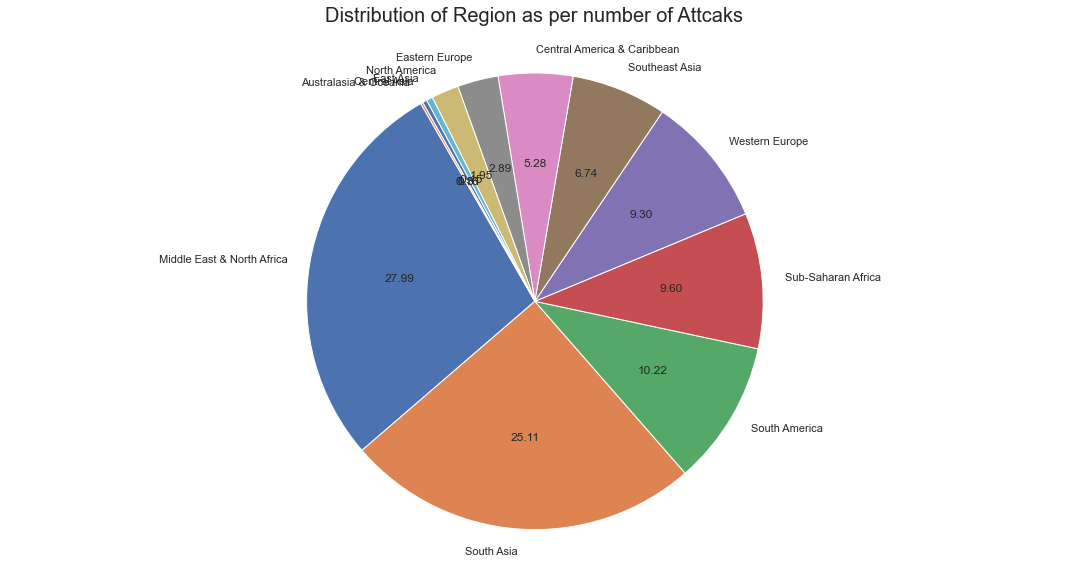

In [27]:
sns.set(rc={'figure.figsize':(15,8)},style="darkgrid", color_codes=True)
pieLabels = temp['Region']
populationShare = temp['Attacks']
figureObject, axesObject = plt.subplots()
axesObject.pie(populationShare, labels=pieLabels, autopct='%1.2f', startangle=120)
axesObject.axis('equal')
plt.title("Distribution of Region as per number of Attcaks\n", size=20)
plt.tight_layout()
plt.show()

In [28]:
temp = df['Year'].value_counts().reset_index()
temp.columns = ["Year","Attacks"]
temp = temp.sort_values(by=['Year']).reset_index()
temp.drop(['index'], axis=1, inplace=True)
temp.head()

Year  Attacks
0  1970      642
1  1971      463
2  1972      550
3  1973      465
4  1974      575

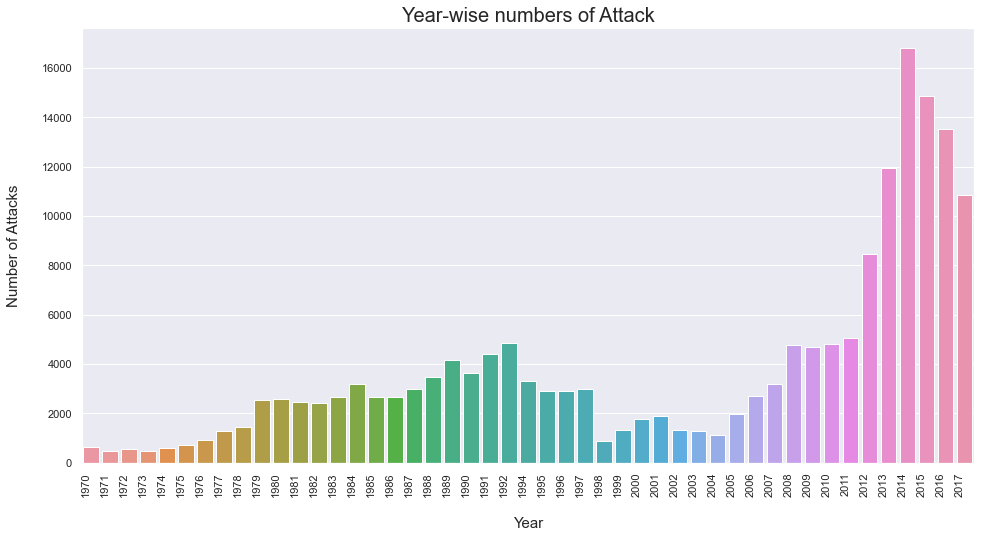

In [29]:
plt.figure(figsize=(16,8))
ax = sns.barplot(temp['Year'],temp['Attacks'])
ax.set_xlabel('\nYear',size=15)
ax.set_ylabel('Number of Attacks\n', size=15)
plt.title("Year-wise numbers of Attack", size=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right");

In [30]:
temp = df['Date'].value_counts().reset_index()
temp.columns = ["Date","Attacks"]
temp = temp.sort_values(by=['Date']).reset_index()
temp.drop(['index'], axis=1, inplace=True)
temp.set_index('Date', inplace=True)
temp.head()

Attacks
Date            
1970-01       38
1970-02       55
1970-03       67
1970-04       77
1970-05       72

Text(0.5, 1.0, 'Date VS Numbers of Attack')

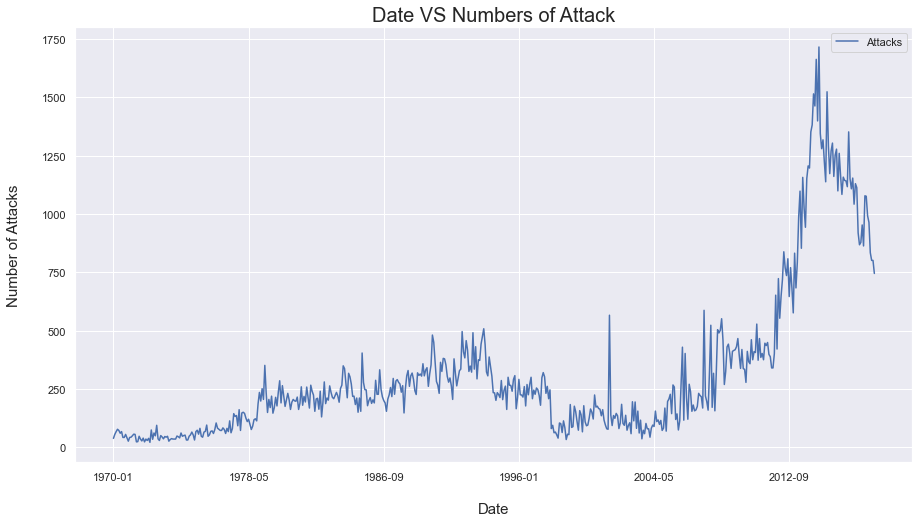

In [31]:
sns.set(rc={'figure.figsize':(15,8)},style="darkgrid", color_codes=True)
ax = temp.plot()
ax.set_xlabel('\nDate',size=15)
ax.set_ylabel('Number of Attacks\n', size=15)
plt.title("Date VS Numbers of Attack", size=20)

**Observations**:
- Terrorist acticities were less in early 70s to pre-80s.
- There was rise in terroist activites between 1980 to 1997.
- After 2004 there is sudden increase in terrorist activities and reached its heights in 2012-2014.
- We can see decline in terrosist activities past few year as compared to last few years.

**Conclusion:**

- As a security/defense analyst, try to find out the hot zone of terrorism:
- - Middle East & North America and South Asia is the primary hot zones of terrorism.
- - Iraq, Pakistan, Afghanisthan, India are the prime regions for terrorist activites.

### Section 2

### Data Preprocessing

In [32]:
df = data.copy()

In [33]:
df = df[['iyear','imonth','country_txt','success','attacktype1_txt','targtype1_txt',
         'gname', 'weaptype1_txt','nkill']]

df.columns = ['Year', 'Month', 'Country', 'Success', 'Attack_Type', 'Target',
             'Terrorist_Org', 'Weapon_Used', 'Casualties']

df.head()

Year  Month             Country  Success                     Attack_Type  \
0  1970      7  Dominican Republic        1                   Assassination   
1  1970      0              Mexico        1     Hostage Taking (Kidnapping)   
2  1970      1         Philippines        1                   Assassination   
3  1970      1              Greece        1               Bombing/Explosion   
4  1970      1               Japan        1  Facility/Infrastructure Attack   

                        Target                       Terrorist_Org  \
0  Private Citizens & Property                              MANO-D   
1      Government (Diplomatic)  23rd of September Communist League   
2          Journalists & Media                             Unknown   
3      Government (Diplomatic)                             Unknown   
4      Government (Diplomatic)                             Unknown   

  Weapon_Used  Casualties  
0     Unknown         1.0  
1     Unknown         0.0  
2     Unknown         1.0  
3  Explosives         NaN  
4  Incendiary         NaN

In [34]:
df.shape

(181691, 9)

In [35]:
df.isnull().sum()

Year                 0
Month                0
Country              0
Success              0
Attack_Type          0
Target               0
Terrorist_Org        0
Weapon_Used          0
Casualties       10313
dtype: int64

In [36]:
## percentage of null values

for i in range(len(df.columns)):
    print(f'Percentage of missing values in {df.columns[i]} is: ', np.round(((df.isnull().sum()[i])/len(df))*100))

Percentage of missing values in Year is:  0.0
Percentage of missing values in Month is:  0.0
Percentage of missing values in Country is:  0.0
Percentage of missing values in Success is:  0.0
Percentage of missing values in Attack_Type is:  0.0
Percentage of missing values in Target is:  0.0
Percentage of missing values in Terrorist_Org is:  0.0
Percentage of missing values in Weapon_Used is:  0.0
Percentage of missing values in Casualties is:  6.0


In [37]:
df.dropna(inplace=True)
df.shape

(171378, 9)

In [38]:
df[df==0].count()

Year                 0
Month                9
Country              0
Success          19657
Attack_Type          0
Target               0
Terrorist_Org        0
Weapon_Used          0
Casualties       88149
dtype: int64

Months cannot be 0.

In [39]:
df = df[df.Month != 0].reset_index()
df.drop(['index'], axis=1, inplace=True)
df.shape

(171369, 9)

In [40]:
df.dtypes

Year               int64
Month              int64
Country           object
Success            int64
Attack_Type       object
Target            object
Terrorist_Org     object
Weapon_Used       object
Casualties       float64
dtype: object

In [41]:
df['Year'] = df['Year'].astype("str")
df['Month'] = df['Month'].astype("str")
df["Date"] = pd.to_datetime(df["Month"] + "/" + df["Year"])
df['Date'] = df['Date'].dt.strftime('%Y-%m')

### Exploratory Data Analysis

In [42]:
temp = df.groupby(['Country']).agg({'Casualties': ['sum']}).reset_index()
temp.columns = ['Country', 'Casualties']
temp = temp.sort_values(by=['Casualties'],ascending=False).reset_index()
temp.drop(['index'], axis=1, inplace=True)
top_20 = temp.head(20)

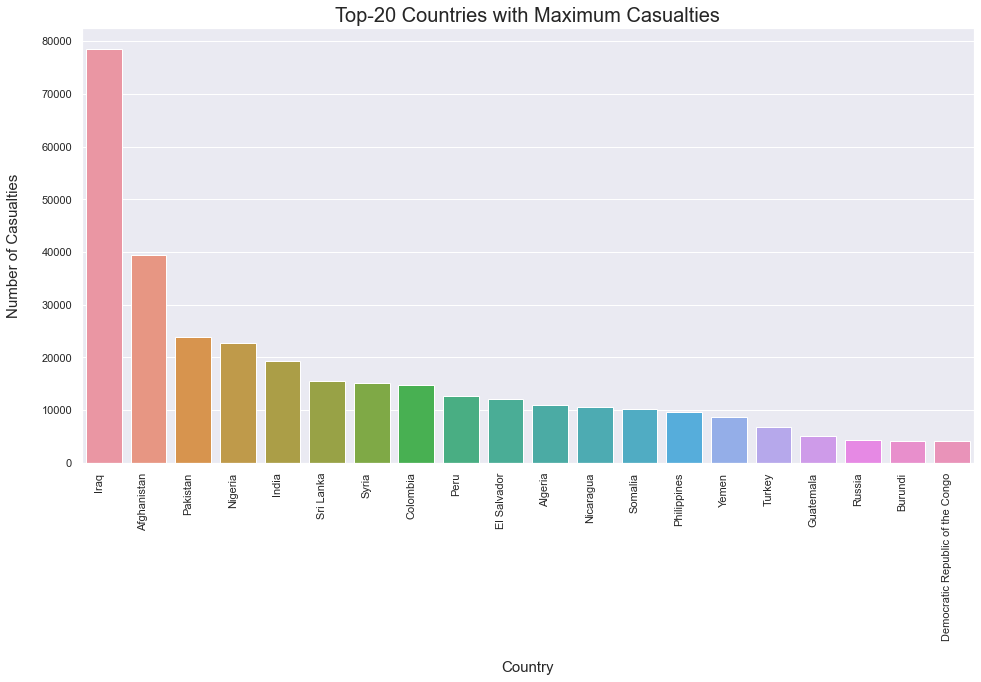

In [43]:
plt.figure(figsize=(16,8))
ax = sns.barplot(top_20['Country'],top_20['Casualties'])
ax.set_xlabel('\nCountry',size=15)
ax.set_ylabel('Number of Casualties\n', size=15)
plt.title("Top-20 Countries with Maximum Casualties", size=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right");

**Observations:**
- Iraq has maximum number of Casualties and approximately twice of Afghanistan.

In [44]:
temp = df.groupby(['Country']).agg({'Success': ['sum']}).reset_index()
temp.columns = ['Country', 'Success']
temp = temp.sort_values(by=['Success'],ascending=False).reset_index()
temp.drop(['index'], axis=1, inplace=True)
top_20 = temp.head(20)

In [45]:
plt.figure(figsize=(16,8))
ax = sns.barplot(top_20['Country'],top_20['Success'])
ax.set_xlabel('\nCountry',size=15)
ax.set_ylabel('Number of Attacks Succeeded\n', size=15)
plt.title("Top-20 Countries with Maximum number of Succeded Attacks", size=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right");

**Observations**:
- Iraq also has faced maximum number of Succeeded Attacks.
- Followed by Pakistan, Afghansitan and India.
- Defence System foe these top Countries should be increased.

TOP-10 HOT ZONE TERRORISM COUNTRIES YAERLY PLOT


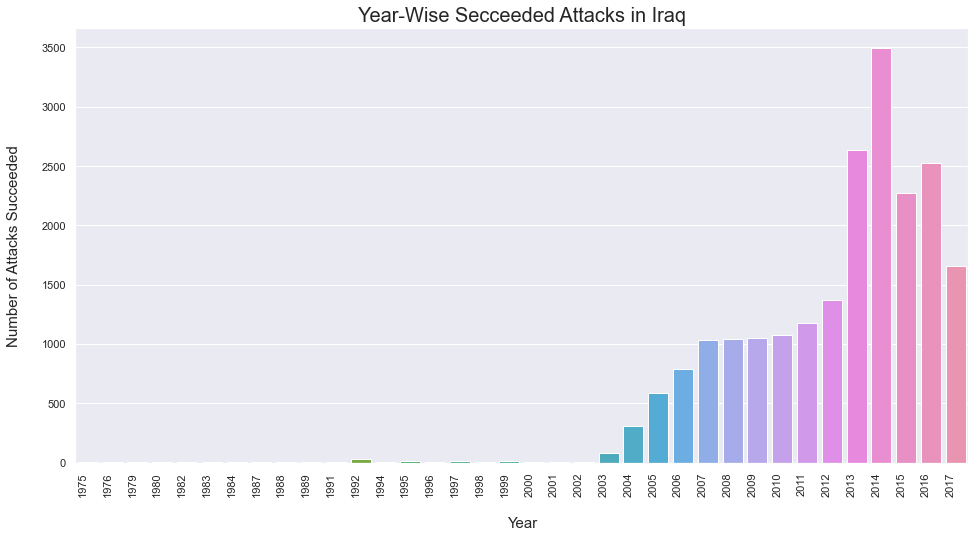

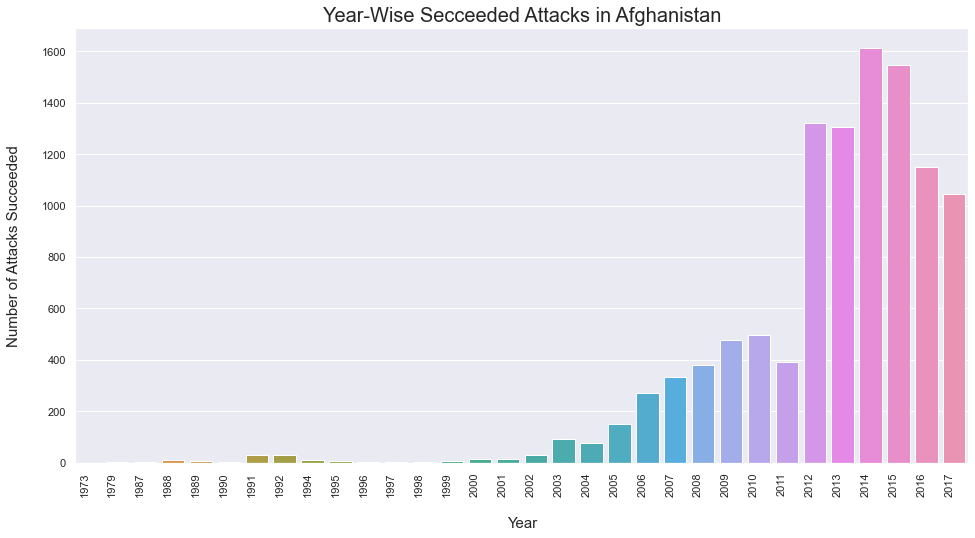

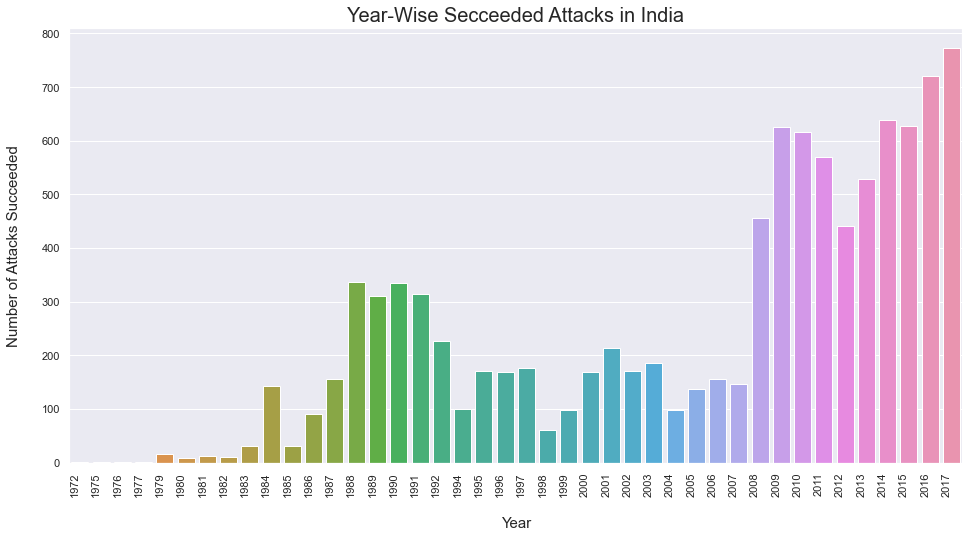

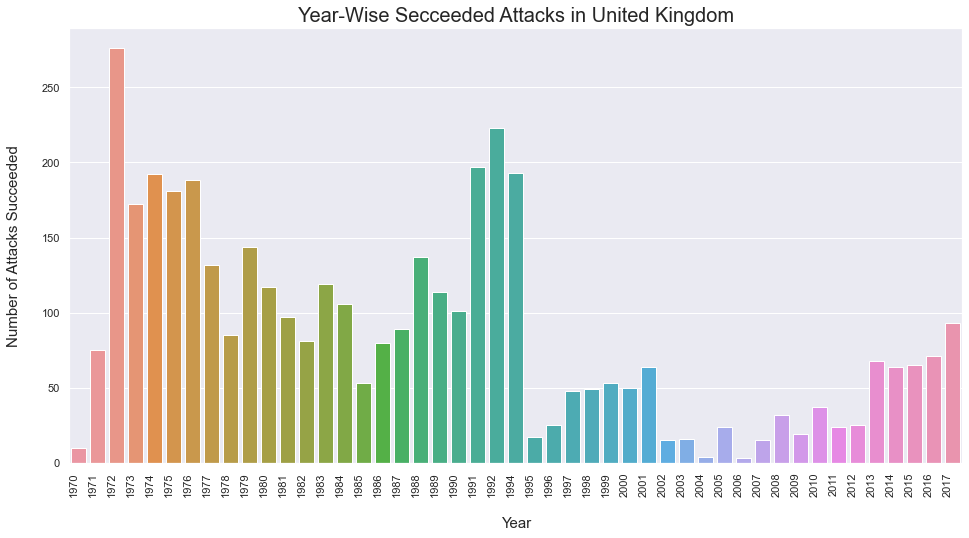

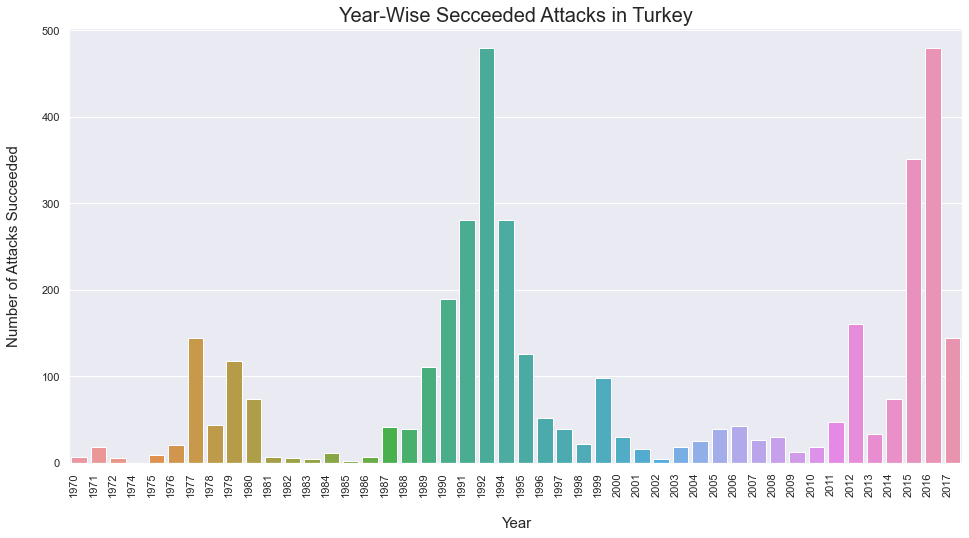

In [46]:
x = Top_20['Country'].head(10)

temp = df.groupby(['Year','Country']).agg({'Success': ['sum']}).reset_index()
temp.columns = ['Year','Country','Success']

print("TOP-10 HOT ZONE TERRORISM COUNTRIES YAERLY PLOT")

for i in x:
    a = temp[temp['Country']==i]
    plt.figure(figsize=(16,8))
    ax = sns.barplot(a['Year'],a['Success'])
    ax.set_xlabel('\nYear',size=15)
    ax.set_ylabel('Number of Attacks Succeeded\n', size=15)
    plt.title(f"Year-Wise Secceeded Attacks in {i}", size=20)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
    plt.show()

**Observations:**
- Some countries like Colombia, Peru, El Salvador and UK were the hot-zones of Terrorisms before 2000. But, got control over it from the beiginning of 2000.
- On the other hand, countries like Iraq, Pakistan, Afganistan, Philippines are became the hottest zones for terrorism after 2000.
- India and Turkey has controlled terrorism over a period but yoy can observe outrages of terrorism again.

In [47]:
temp = df.groupby(['Attack_Type']).agg({'Casualties': ['sum']}).reset_index()
temp.columns = ['Attack_Type', 'Casualties']
temp = temp.sort_values(by=['Casualties'],ascending=False).reset_index()
temp.drop(['index'], axis=1, inplace=True)
temp

Attack_Type  Casualties
0                        Armed Assault    160297.0
1                    Bombing/Explosion    157321.0
2                              Unknown     32378.0
3                        Assassination     24920.0
4          Hostage Taking (Kidnapping)     24231.0
5  Hostage Taking (Barricade Incident)      4478.0
6                            Hijacking      3718.0
7       Facility/Infrastructure Attack      3642.0
8                      Unarmed Assault       880.0

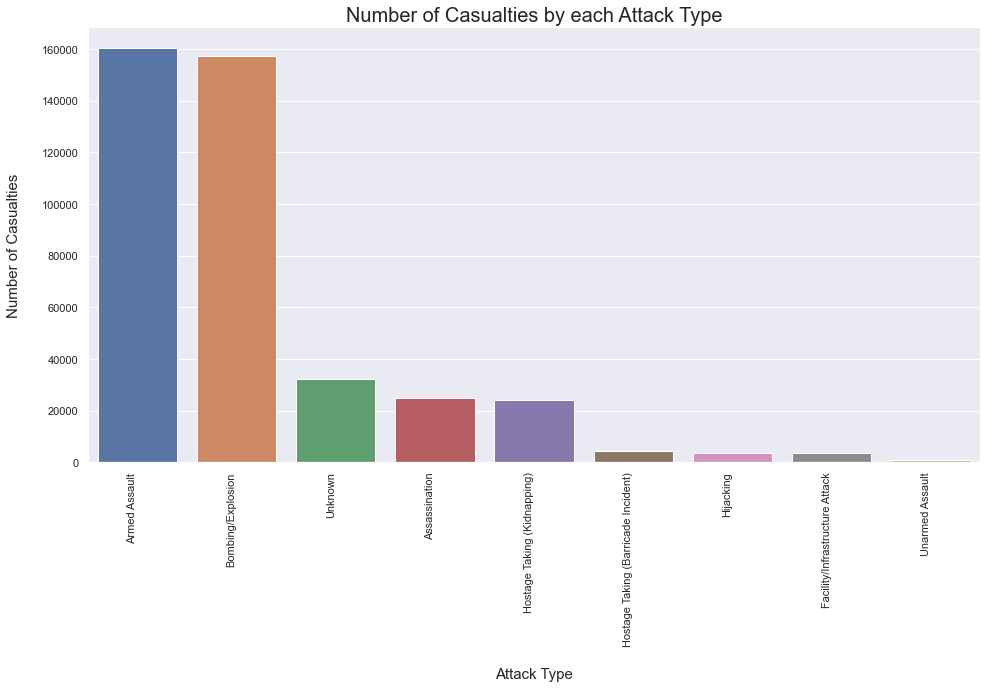

In [48]:
plt.figure(figsize=(16,8))
ax = sns.barplot(temp['Attack_Type'],temp['Casualties'])
ax.set_xlabel('\nAttack Type',size=15)
ax.set_ylabel('Number of Casualties\n', size=15)
plt.title("Number of Casualties by each Attack Type", size=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right");

**Observations:**
- Armed Assault and Bombing/Explosion have too high for the number of casulaties with comparison to others.

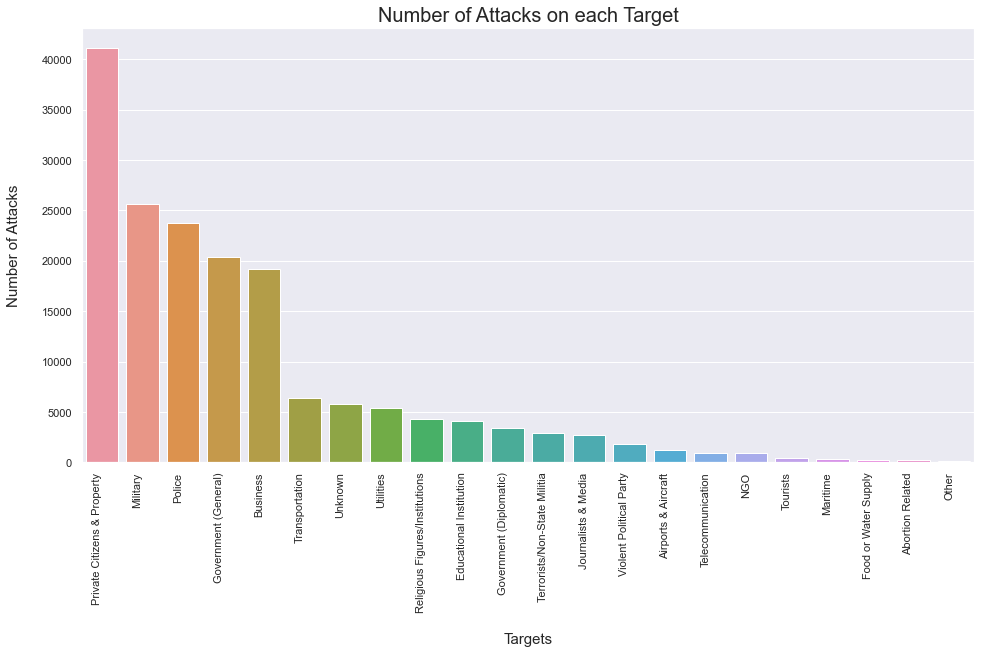

In [49]:
temp = df['Target'].value_counts().reset_index()
temp.columns = ['Target', 'Attacks']
plt.figure(figsize=(16,8))
ax = sns.barplot(temp['Target'],temp['Attacks'])
ax.set_xlabel('\nTargets',size=15)
ax.set_ylabel('Number of Attacks\n', size=15)
plt.title("Number of Attacks on each Target", size=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right");

**Observations:**
- Private Citizens & Property is highest among all.
- Military and Police camps has been targets, obviously to weaken the strengh of a country.
- Government Centers and Bussiness Centers are also been primary targets.

TOP-10 HOT ZONE TERRORISM COUNTRIES YAERLY PLOT


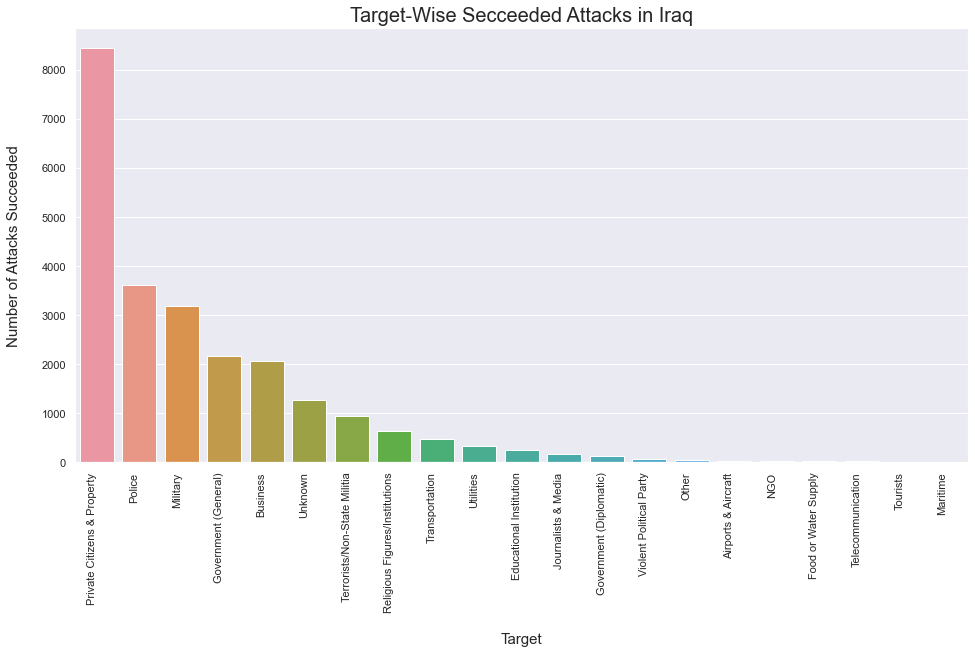

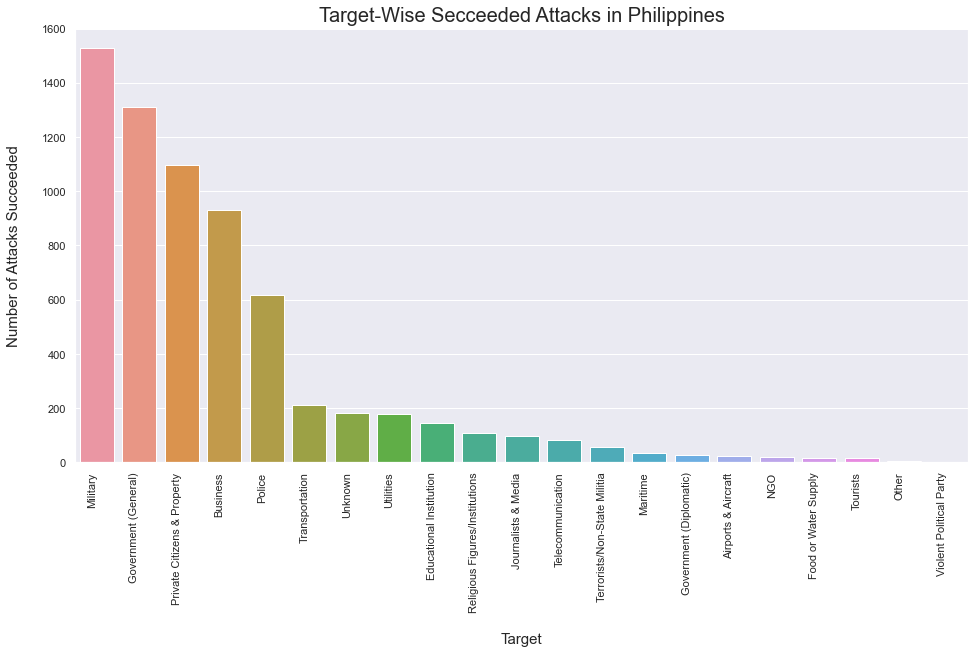

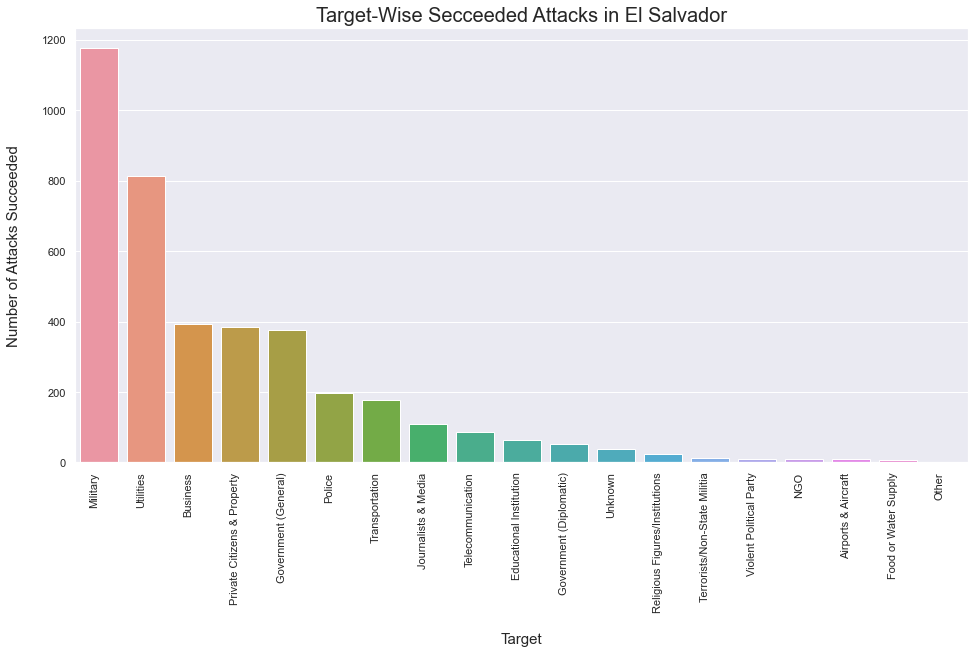

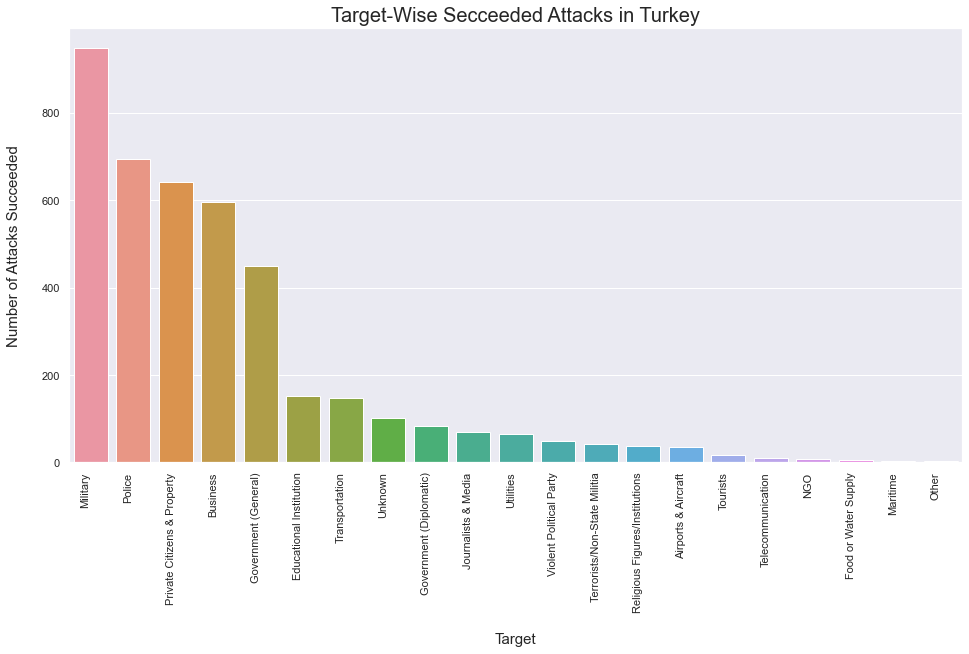

In [50]:
x = Top_20['Country'].head(10)

temp = df.groupby(['Target','Country']).agg({'Success': ['count']}).reset_index()
temp.columns = ['Target', 'Country','Successful Attacks']
temp = temp.sort_values(by=['Successful Attacks'],ascending=False).reset_index()
temp.drop(['index'], axis=1, inplace=True)

print("TOP-10 HOT ZONE TERRORISM COUNTRIES YAERLY PLOT")

for i in x:
    a = temp[temp['Country']==i]
    plt.figure(figsize=(16,8))
    ax = sns.barplot(a['Target'],a['Successful Attacks'])
    ax.set_xlabel('\nTarget',size=15)
    ax.set_ylabel('Number of Attacks Succeeded\n', size=15)
    plt.title(f"Target-Wise Secceeded Attacks in {i}", size=20)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
    plt.show()

**Observations**:
- Private Citizens & Property is always in the Top-4 most Targeted Centers by Organisation.
- Military, Business, Police and Government Area are also the major targeted points in few countries.

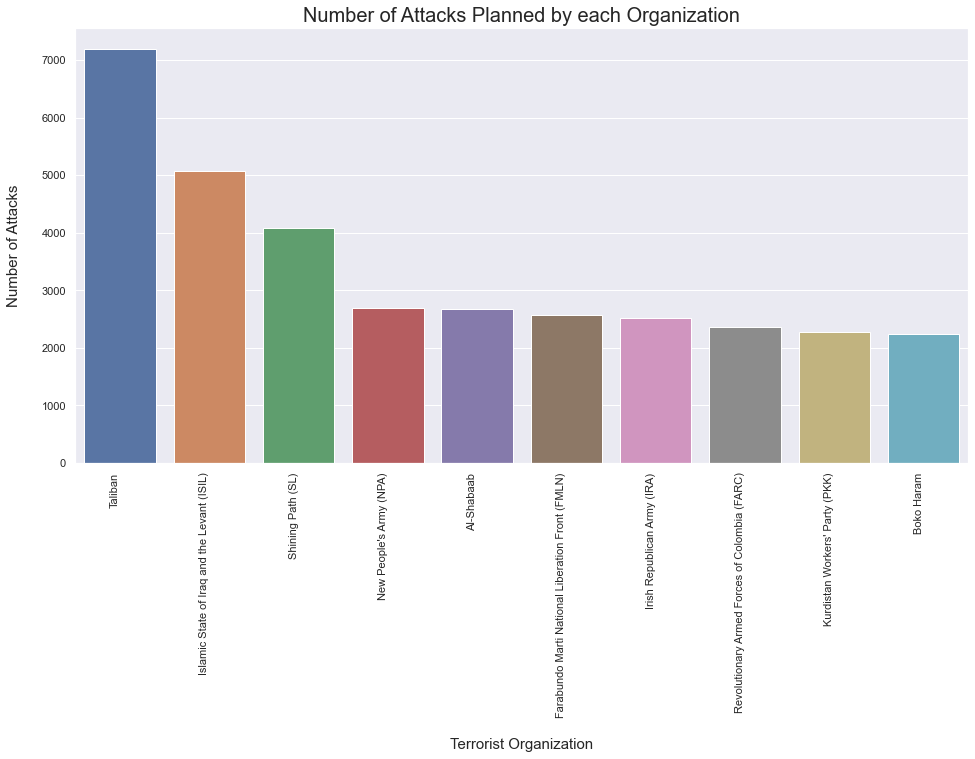

In [51]:
temp = df['Terrorist_Org'].value_counts().reset_index()
temp.columns = ['Terrorist_Org', 'Attacks Planned']
top_10 = temp[1:11]
plt.figure(figsize=(16,8))
ax = sns.barplot(top_10['Terrorist_Org'],top_10['Attacks Planned'])
ax.set_xlabel('\nTerrorist Organization',size=15)
ax.set_ylabel('Number of Attacks\n', size=15)
plt.title("Number of Attacks Planned by each Organization", size=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right");

**Observations:**
- Except the Unkown Organization, Taliban has planned maximum number of Attacks.
- Followed by ISIL, also called ISI and SL.

**Conclusion:**
- As a Defence Analyst, I'll first try to strengthen my countries border.
- Increase Security and Services at most targeted places.
- Minimize the circulation of Weapons like Arms and Explosives within the country.
- Try to find out the Terrorist Organizations hub and destroy it asap.

### Motive Analysis

In [52]:
df = data['motive'].reset_index()

In [53]:
df.isnull().sum()

index          0
motive    131130
dtype: int64

In [54]:
df.dropna()

index                                             motive
5            5     To protest the Cairo Illinois Police Deparment
8            8        To protest the War in Vietnam and the draft
9            9        To protest the War in Vietnam and the draft
11          11                  Protest the draft and Vietnam War
14          14  To protest United States owned businesses in P...
...        ...                                                ...
181663  181663  The specific motive is unknown; however, sourc...
181665  181665  The specific motive is unknown; however, sourc...
181672  181672  The specific motive is unknown; however, sourc...
181682  181682  The specific motive is unknown; however, sourc...
181683  181683  The specific motive is unknown; however, sourc...

[50561 rows x 2 columns]

In [55]:
df.dtypes

index      int64
motive    object
dtype: object

In [56]:
def create_para(data):
    new_para = ''
    for i in range(1,len(data)):
        new_para = new_para+str(data['motive'][i])
    return new_para

new_para = create_para(df)

In [57]:
def rmv_punc(para):
    '''
    This function will remove punctuations and digits
    from the paragraph
    '''
    para = re.sub(r'[^\w\s]','',para)
    para = re.sub(r'[\d]','',para)
    para = re.sub(r' L ','',para)
    
    return para

new_para = rmv_punc(new_para)

In [58]:
def rmv_add(para):
    '''
    This function will remove additional data
    from the paragraph
    '''
    para = re.sub('unknown','',para)
    return para
new_para = rmv_add(new_para)
new_para = new_para.lower()

In [59]:
stopwords = set(STOPWORDS)
stopwords.update(['attack','accused','specific','motive','incident','victim','suspected','may','sources','related','target',
                 'targeted','iraq','new','peoples','carried','noted','claimed','responsibility','islamic','stated', 'united', 
                  'states','states','part','response','violence','attacks','group','larger'])

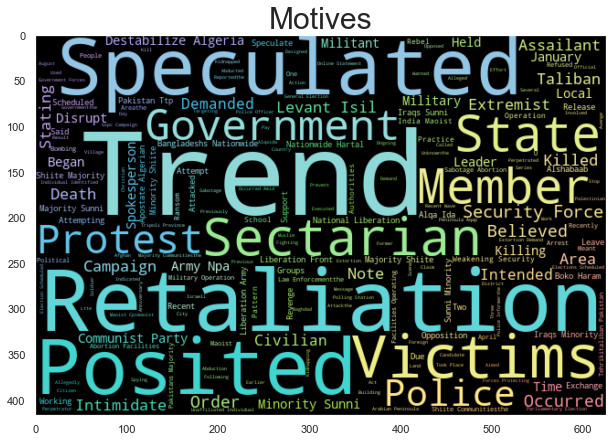

In [60]:
motive_mask = np.array(Image.open('bkgd.jpg'))

def plot_wc(string,mask):
    '''
    This funtion is used to create a simple wordcloud.
    '''
    image = WordCloud(stopwords=stopwords,mask=mask).generate(string.title())
    plt.figure(figsize=(15,7))
    image_colors = ImageColorGenerator(mask)
    plt.grid(False)
    plt.imshow(image.recolor(color_func=image_colors), interpolation="bilinear")
    plt.title('Motives',size=30)
plot_wc(new_para, motive_mask)